In [64]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import pandas as pd
import numpy as np
import scipy.stats
import os
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors

In [66]:
wmo_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/geo_scores/WMO_rates.csv"
)
wmo_df = wmo_df.sort_values("Station ID")
wmo_df

,Station ID,Station Position Description,Roughness (within 100 m),T & RH Class,Precipitation Class,Wind Class,Direct Radiation Class,Global/Diffuse Radiation Class,Greatest slope (4 cardinal directions),Added Slopes (4 cardinal directions),Added slopes >20?,Obstructions (within 100m),Angular height of nearest obstacle,Distance from artificial heat sources/bodies of water,Angular height of surrounding vegetation within 100m,Angular height of nearest thin obstacle,Angular width of nearest thin obstacle,Surrounding terrain greatest relief change
0,ADDI,Open area in a cow pasture with some small tre...,Class 4,Class 1,Class 2,Class 1,Class 2,Class 1,8.47,14.15,NaN,Trees,22,NaN,NaN,22,NaN,6
1,ANDE,"Flat, open field with treeline surrounding fro...",Class 5,Class 1,Class 2,Class 2,Class 3,Class 2,12.55,33.44,Y,"Trees, power lines",?,?,?,20,1,15
3,BATA,Large open field with a tower and treeline to ...,Class 3,Class 1,Class 1,Class 1,Class 1,Class 1,5.67,10.44,NaN,"Tower, gravel path",8,100+,2,8,?,7
4,BEAC,Field with varying vegetation and a tower nearby,Class 4,Class 2,Class 3,Class 3,Class 3,Class 2,11.75,17.97,NaN,"Tower, trees, power lines, fence",?,NaN,NaN,?,?,?
5,BELD,"Flat, open field with no obstacles present",Class 3,Class 1,Class 1,Class 1,Class 1,Class 1,14.20,29.84,Y,Power lines,?,100,?,?,?,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
wmo_df.keys()

Index(['Station ID', 'Station Position Description',
       'Roughness (within 100 m)', 'T & RH Class', 'Precipitation Class',
       'Wind Class', 'Direct Radiation Class',
       'Global/Diffuse Radiation Class',
       'Greatest slope (4 cardinal directions)',
       'Added Slopes (4 cardinal directions)', 'Added slopes >20?',
       'Obstructions (within 100m)', 'Angular height of nearest obstacle',
       'Distance from artificial heat sources/bodies of water',
       'Angular height of surrounding vegetation within 100m',
       'Angular height of nearest thin obstacle',
       'Angular width of nearest thin obstacle',
       'Surrounding terrain greatest relief change'],
      dtype='object')

In [68]:
score_dict = {"Class 1": 1, "Class 2": 2, "Class 3": 3, "Class 4": 4, "Class 5": 5}

color_dict = {
    "Class 1": "springgreen",
    "Class 2": "dodgerblue",
    "Class 3": "gold",
    "Class 4": "darkorange",
    "Class 5": "red",
}

In [69]:
def landtype(the_df: pd.DataFrame, col, title) -> None:
    """
    this plots the landtype for a specified region determined by the imported dataframe

    Args:
        df (pd.DataFrame): landtype, lat, lon
    """
    df = the_df.copy()

    df["color"] = df[col].map(color_dict)

    projPC = crs.PlateCarree()
    latN = 45.1
    latS = 40
    lonW = -80
    lonE = -72
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(12, 9), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.legend()
    ax.set_title(f"{title}", fontsize=20)
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )

    plt.scatter(
        df["lon"],
        df["lat"],
        c=df["color"],
        s=100,
        edgecolors="black",
        transform=crs.PlateCarree(),
        zorder=5,
    )

    COLORS = ["springgreen", "dodgerblue", "gold", "darkorange", "red"]
    LEG_STR = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
    # legend
    patches = []
    for i, _ in enumerate(COLORS):
        patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
        patches.append(patch)

    plt.legend(
        bbox_to_anchor=(0.90, 1),
        loc="upper left",
        borderaxespad=0,
        handles=patches,
        fontsize=20,
    )

In [70]:
def best_worst(the_df: pd.DataFrame, title, color) -> None:
    """
    this plots the landtype for a specified region determined by the imported dataframe

    Args:
        df (pd.DataFrame): landtype, lat, lon
    """
    df = the_df.copy()

    projPC = crs.PlateCarree()
    latN = 45.1
    latS = 40
    lonW = -80
    lonE = -72
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(12, 9), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.legend()
    ax.set_title(f"{title}", fontsize=20)
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )

    plt.scatter(
        df["lon"],
        df["lat"],
        c=color,
        s=100,
        edgecolors="black",
        transform=crs.PlateCarree(),
        zorder=5,
    )

    # Loop for annotation of all points
    for i, _ in enumerate(df["lon"]):
        plt.annotate(
            df["station"].iloc[i], (df["lon"].iloc[i], df["lat"].iloc[i] + 0.1)
        )

In [71]:
stations = wmo_df["Station ID"].iloc[:126]
temp_rh = wmo_df["T & RH Class"].iloc[:126]
precip = wmo_df["Precipitation Class"].iloc[:126]
wind = wmo_df["Wind Class"].iloc[:126]
rad = wmo_df["Direct Radiation Class"].iloc[:126]
glob_rad = wmo_df["Global/Diffuse Radiation Class"].iloc[:126]

In [72]:
nysm_cats_df = pd.read_csv("/home/aevans/nwp_bias/src/landtype/data/nysm.csv")
lons = nysm_cats_df["lon [degrees]"].to_list()
lats = nysm_cats_df["lat [degrees]"].to_list()

In [73]:
nysm_cats_df

,stid,number,name,lat [degrees],lon [degrees],elevation [m],county,nearest_city,state,distance_from_town [km],direction_from_town [degrees],climate_division,climate_division_name,wfo,commissioned,decommissioned
0,ADDI,107,Addison,42.040360,-77.237260,507.6140,Steuben,Addison,NY,6.9,S,1,Western Plateau,BGM,2016-08-10 18:15:00 UTC,NaN
1,ANDE,111,Andes,42.182270,-74.801390,518.2820,Delaware,Andes,NY,1.5,WSW,2,Eastern Plateau,BGM,2016-08-04 15:55:00 UTC,NaN
2,BATA,24,Batavia,43.019940,-78.135660,276.1200,Genesee,Batavia,NY,4.9,ENE,9,Great Lakes,BUF,2016-02-18 18:40:00 UTC,NaN
3,BEAC,76,Beacon,41.528750,-73.945270,90.1598,Dutchess,Beacon,NY,3.3,NE,5,Hudson Valley,ALY,2016-08-22 16:45:00 UTC,NaN
4,BELD,90,Belden,42.223220,-75.668520,470.3700,Broome,Belden,NY,2.2,NNE,2,Eastern Plateau,BGM,2015-11-30 20:20:00 UTC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,WFMB,14,Whiteface Mountain Base,44.393236,-73.858829,614.5990,Essex,Wilmington,NY,3.5,W,3,Northern Plateau,BTV,2016-01-29 20:55:00 UTC,NaN
122,WGAT,123,Woodgate,43.532408,-75.158597,442.9660,Oneida,Woodgate,NY,1.4,NNW,3,Northern Plateau,BGM,2016-08-29 18:20:00 UTC,NaN
123,WHIT,10,Whitehall,43.485073,-73.423071,36.5638,Washington,Whitehall,NY,8.0,S,7,Champlain Valley,ALY,2015-08-26 20:30:00 UTC,NaN
124,WOLC,79,Wolcott,43.228680,-76.842610,121.2190,Wayne,Wolcott,NY,2.4,WNW,9,Great Lakes,BUF,2016-03-09 18:10:00 UTC,NaN


In [74]:
lons

[-77.23726,
 -74.80139,
 -78.13566,
 -73.94527,
 -75.66852,
 -76.11373,
 -78.03958,
 -76.20319,
 -75.95104,
 -73.953678,
 -79.02154,
 -73.57642,
 -77.96592,
 -73.893522,
 -75.29929,
 -73.87498,
 -78.76717,
 -76.77176,
 -78.74903,
 -75.74299,
 -76.32686,
 -73.46461,
 -73.77736,
 -75.975622,
 -74.5171,
 -77.18518,
 -79.62408,
 -74.507967,
 -77.43762,
 -74.978778,
 -73.51988,
 -75.607866,
 -75.201,
 -76.10445,
 -78.4232,
 -75.392193,
 -73.57542,
 -74.17361,
 -78.63173,
 -74.11293,
 -75.24413,
 -74.87992,
 -73.84502,
 -76.83664,
 -73.371896,
 -75.990041,
 -79.3666,
 -74.17867,
 -73.60202,
 -75.40925,
 -76.37534,
 -77.94946,
 -75.61729,
 -74.69849,
 -75.68853,
 -77.689733,
 -75.00957,
 -74.12312,
 -74.23933,
 -74.301767,
 -76.47006,
 -73.71557,
 -75.1369,
 -75.05608,
 -74.328874,
 -73.964482,
 -78.30927,
 -74.16541,
 -75.642447,
 -74.99689,
 -74.22273,
 -73.70516,
 -74.97786,
 -78.40743,
 -77.37331,
 -74.665437,
 -75.71175,
 -76.553233,
 -74.50368,
 -76.25543,
 -76.98746,
 -75.71591,
 -74.5

In [75]:
plot_df = pd.DataFrame()
plot_df["station"] = stations
plot_df["lon"] = lons
plot_df["lat"] = lats
plot_df["temp_rh"] = temp_rh.astype(dtype=str)
plot_df["precip"] = precip.astype(dtype=str)
plot_df["wind"] = wind.astype(dtype=str)
plot_df["rad"] = rad.astype(dtype=str)
plot_df["glob_rad"] = glob_rad.astype(dtype=str)

In [76]:
plot_df

,station,lon,lat,temp_rh,precip,wind,rad,glob_rad
0,ADDI,-77.237260,42.040360,Class 1,Class 2,Class 1,Class 2,Class 1
1,ANDE,-74.801390,42.182270,Class 1,Class 2,Class 2,Class 3,Class 2
3,BATA,-78.135660,43.019940,Class 1,Class 1,Class 1,Class 1,Class 1
4,BEAC,-73.945270,41.528750,Class 2,Class 3,Class 3,Class 3,Class 2
5,BELD,-75.668520,42.223220,Class 1,Class 1,Class 1,Class 1,Class 1
...,...,...,...,...,...,...,...,...
120,WFMB,-73.858829,44.393236,Class 4,Class 4,Class 5,Class 5,Class 5
124,WGAT,-75.158597,43.532408,Class 3,Class 3,Class 4,Class 4,Class 4
121,WHIT,-73.423071,43.485073,Class 2,Class 1,Class 2,Class 2,Class 1
122,WOLC,-76.842610,43.228680,Class 1,Class 1,Class 1,Class 2,Class 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


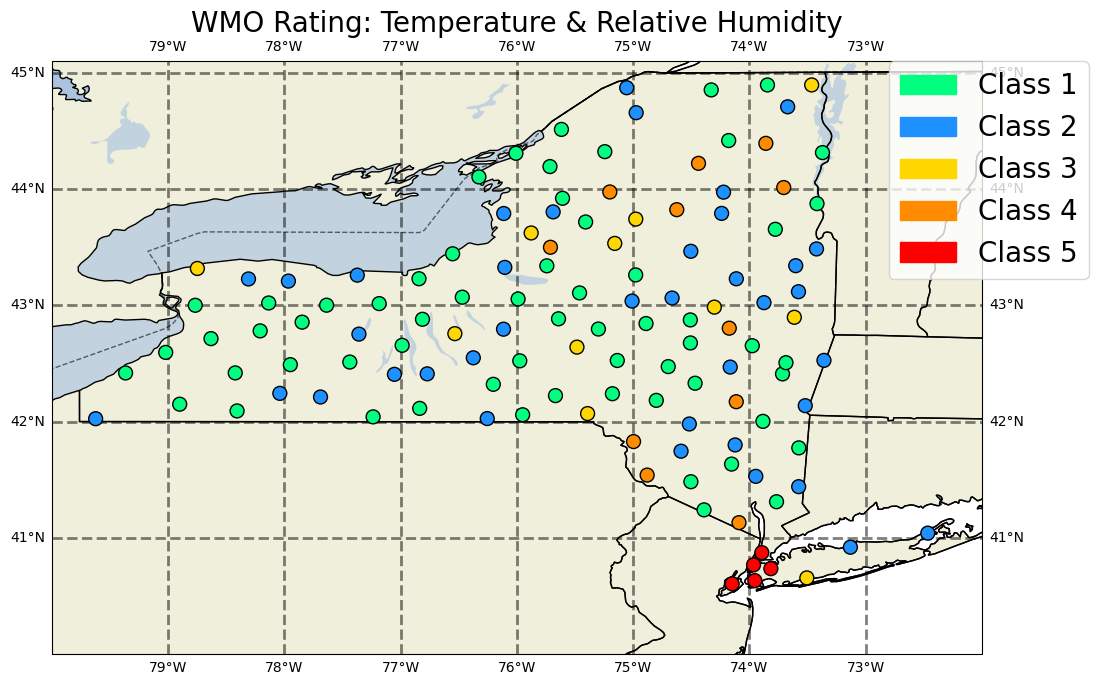

In [77]:
landtype(plot_df, "temp_rh", "WMO Rating: Temperature & Relative Humidity")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


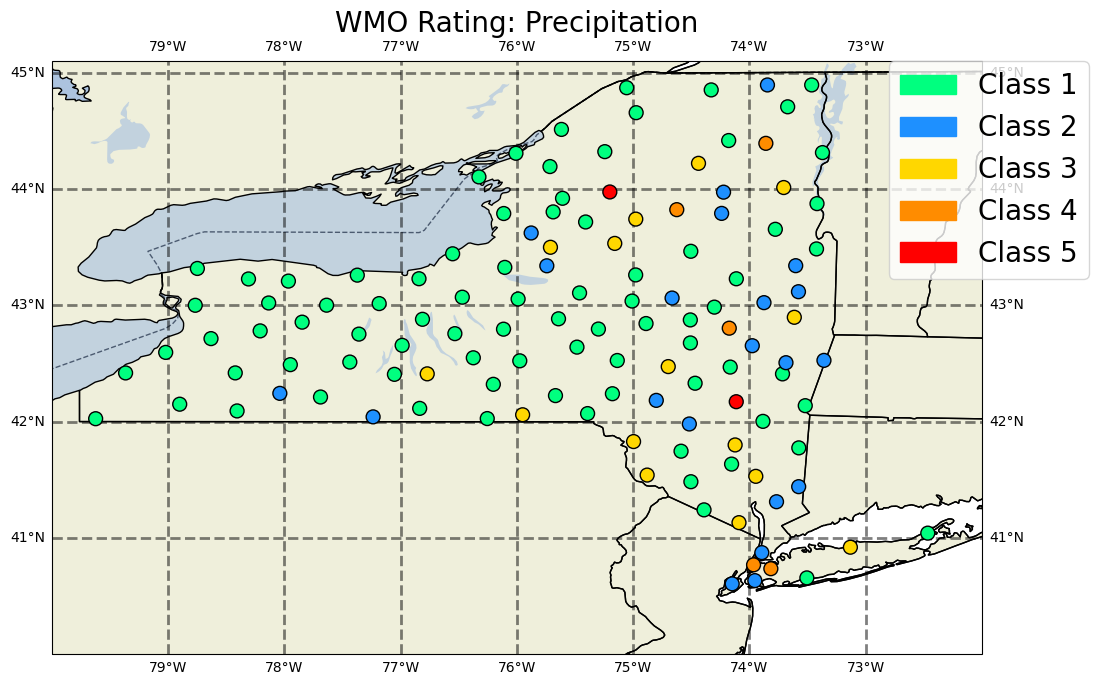

In [78]:
landtype(plot_df, "precip", "WMO Rating: Precipitation")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


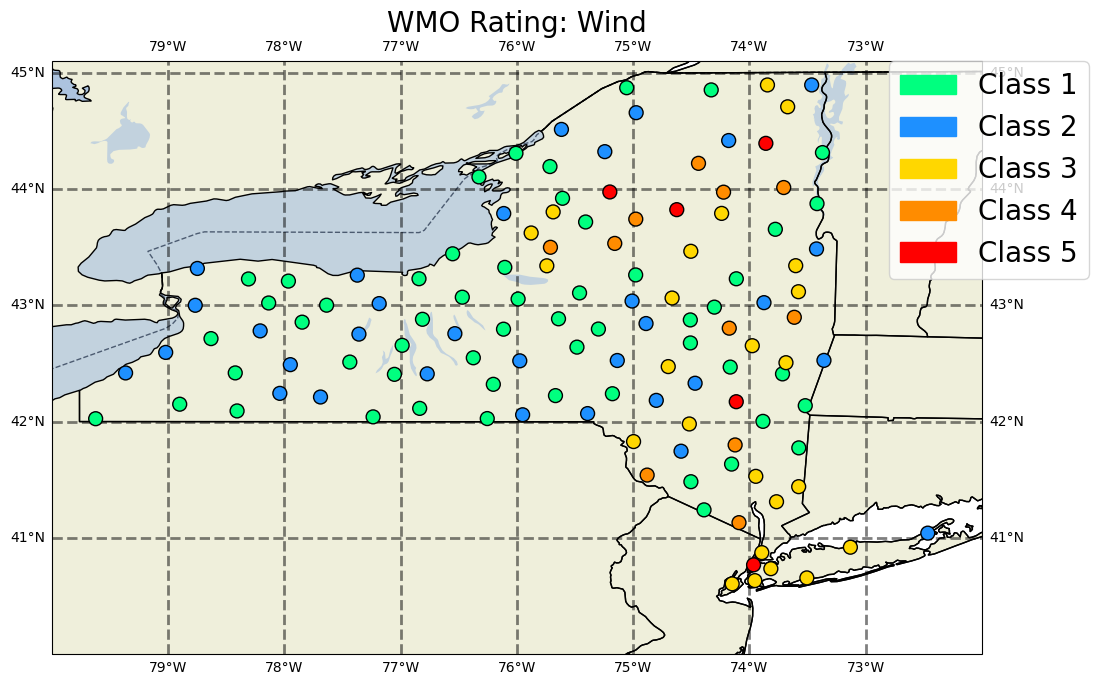

In [79]:
landtype(plot_df, "wind", "WMO Rating: Wind")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


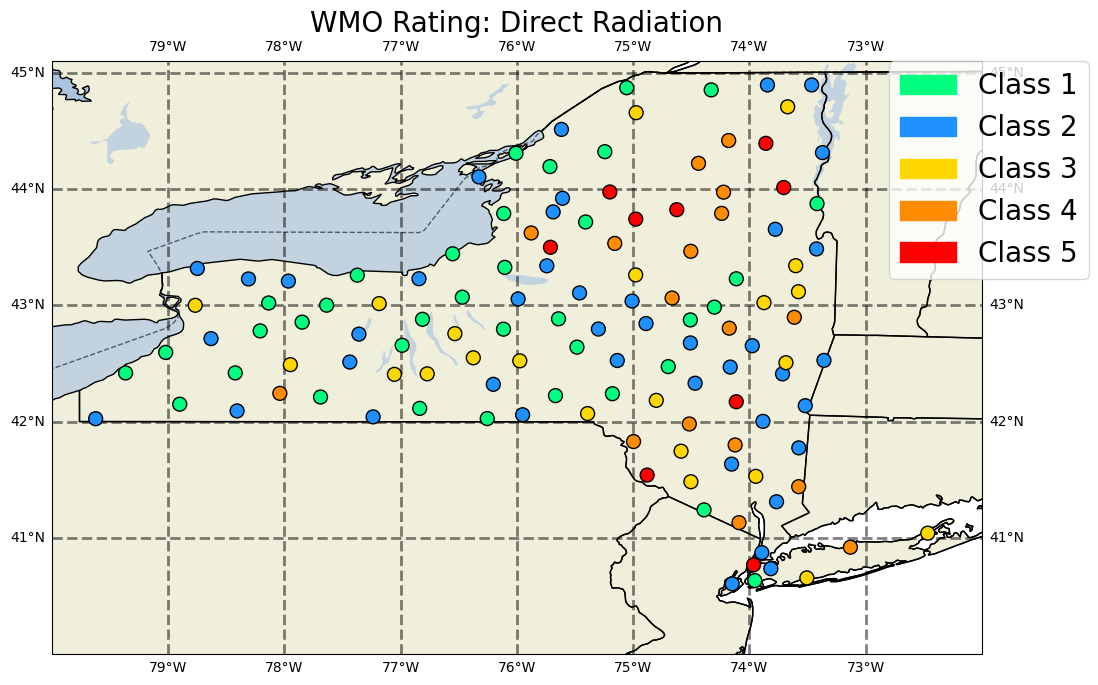

In [80]:
landtype(plot_df, "rad", "WMO Rating: Direct Radiation")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


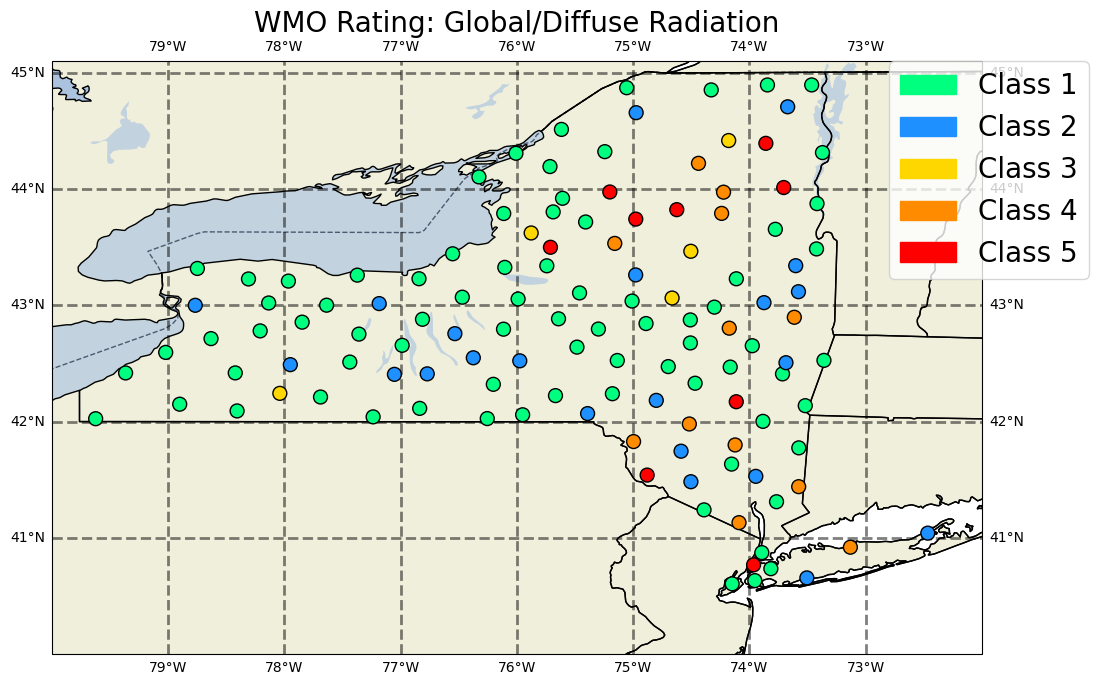

In [81]:
landtype(plot_df, "glob_rad", "WMO Rating: Global/Diffuse Radiation")

In [82]:
wmo_df["T & RH Class Int"] = wmo_df["T & RH Class"].map(score_dict)
wmo_df["Precipitation Class Int"] = wmo_df["Precipitation Class"].map(score_dict)
wmo_df["Wind Class Int"] = wmo_df["Wind Class"].map(score_dict)
wmo_df["Direct Radiation Class Int"] = wmo_df["Direct Radiation Class"].map(score_dict)
wmo_df["Global/Diffuse Radiation Class Int"] = wmo_df[
    "Global/Diffuse Radiation Class"
].map(score_dict)

In [83]:
wmo_df = wmo_df.fillna(0)

# Elevation

In [84]:
elev_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/geo_scores/elev_scores.csv"
)

In [85]:
elev_df

,Unnamed: 0,station,elev_score
0,117,ADDI,2
1,28,ANDE,2
2,51,BATA,3
3,67,BEAC,1
4,29,BELD,1
...,...,...,...
121,109,WFMB,1
122,110,WGAT,1
123,19,WHIT,1
124,66,WOLC,3


In [86]:
pers = scipy.stats.pearsonr(
    elev_df["elev_score"], wmo_df["T & RH Class Int"].iloc[:126]
)
rho = scipy.stats.spearmanr(
    elev_df["elev_score"], wmo_df["T & RH Class Int"].iloc[:126]
)
tau = scipy.stats.kendalltau(
    elev_df["elev_score"], wmo_df["T & RH Class Int"].iloc[:126]
)

In [87]:
pers

PearsonRResult(statistic=0.04177402097189121, pvalue=0.6423312683775422)

In [88]:
rho

SignificanceResult(statistic=-0.040753793914111915, pvalue=0.6504843867431089)

In [89]:
tau

SignificanceResult(statistic=-0.037648676327349424, pvalue=0.6356206208748068)

In [90]:
pers = scipy.stats.pearsonr(
    elev_df["elev_score"], wmo_df["Precipitation Class Int"].iloc[:126]
)
rho = scipy.stats.spearmanr(
    elev_df["elev_score"], wmo_df["Precipitation Class Int"].iloc[:126]
)
tau = scipy.stats.kendalltau(
    elev_df["elev_score"], wmo_df["Precipitation Class Int"].iloc[:126]
)

In [91]:
pers

PearsonRResult(statistic=-0.13359941511423704, pvalue=0.13585698245479105)

In [92]:
rho

SignificanceResult(statistic=-0.19277200988768414, pvalue=0.03057026346620619)

In [93]:
tau

SignificanceResult(statistic=-0.1788470081068109, pvalue=0.02724815039189176)

In [94]:
pers = scipy.stats.pearsonr(elev_df["elev_score"], wmo_df["Wind Class Int"].iloc[:126])
rho = scipy.stats.spearmanr(elev_df["elev_score"], wmo_df["Wind Class Int"].iloc[:126])
tau = scipy.stats.kendalltau(elev_df["elev_score"], wmo_df["Wind Class Int"].iloc[:126])

In [95]:
pers

PearsonRResult(statistic=-0.1433641945555703, pvalue=0.10926505220603866)

In [96]:
rho

SignificanceResult(statistic=-0.1853381562303676, pvalue=0.037735300261712165)

In [97]:
tau

SignificanceResult(statistic=-0.1612883592641957, pvalue=0.039737396841855586)

In [98]:
pers = scipy.stats.pearsonr(
    elev_df["elev_score"], wmo_df["Direct Radiation Class Int"].iloc[:126]
)
rho = scipy.stats.spearmanr(
    elev_df["elev_score"], wmo_df["Direct Radiation Class Int"].iloc[:126]
)
tau = scipy.stats.kendalltau(
    elev_df["elev_score"], wmo_df["Direct Radiation Class Int"].iloc[:126]
)

In [99]:
pers

PearsonRResult(statistic=-0.20666687157496155, pvalue=0.020241826471672254)

In [100]:
rho

SignificanceResult(statistic=-0.26224823272771425, pvalue=0.0030121702717448877)

In [101]:
tau

SignificanceResult(statistic=-0.22726633268545066, pvalue=0.003311894977494627)

In [102]:
pers = scipy.stats.pearsonr(
    elev_df["elev_score"], wmo_df["Global/Diffuse Radiation Class Int"].iloc[:126]
)
rho = scipy.stats.spearmanr(
    elev_df["elev_score"], wmo_df["Global/Diffuse Radiation Class Int"].iloc[:126]
)
tau = scipy.stats.kendalltau(
    elev_df["elev_score"], wmo_df["Global/Diffuse Radiation Class Int"].iloc[:126]
)

In [103]:
pers

PearsonRResult(statistic=-0.1929701307498663, pvalue=0.030396312246897265)

In [104]:
rho

SignificanceResult(statistic=-0.18411113967129653, pvalue=0.03904406873104767)

In [105]:
tau

SignificanceResult(statistic=-0.1632035941713067, pvalue=0.04161920586329045)

# Aspect Slope

In [106]:
asp_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/geo_scores/aspect_slope_scores.csv"
)
asp_df

,Unnamed: 0,station,aspect_slope_score
0,117,ADDI,1
1,28,ANDE,2
2,51,BATA,1
3,67,BEAC,1
4,29,BELD,2
...,...,...,...
121,109,WFMB,3
122,110,WGAT,1
123,19,WHIT,1
124,66,WOLC,1


In [107]:
pers = scipy.stats.pearsonr(
    asp_df["aspect_slope_score"], wmo_df["T & RH Class Int"].iloc[:126]
)
rho = scipy.stats.spearmanr(
    asp_df["aspect_slope_score"], wmo_df["T & RH Class Int"].iloc[:126]
)
tau = scipy.stats.kendalltau(
    asp_df["aspect_slope_score"], wmo_df["T & RH Class Int"].iloc[:126]
)
print(pers, rho, tau)

PearsonRResult(statistic=0.07306569555134997, pvalue=0.41617560658301755) SignificanceResult(statistic=0.08484602687662512, pvalue=0.344859443207582) SignificanceResult(statistic=0.07715803189983073, pvalue=0.3441748447697144)


In [108]:
pers = scipy.stats.pearsonr(
    asp_df["aspect_slope_score"], wmo_df["Precipitation Class Int"].iloc[:126]
)
rho = scipy.stats.spearmanr(
    asp_df["aspect_slope_score"], wmo_df["Precipitation Class Int"].iloc[:126]
)
tau = scipy.stats.kendalltau(
    asp_df["aspect_slope_score"], wmo_df["Precipitation Class Int"].iloc[:126]
)
print(pers, rho, tau)

PearsonRResult(statistic=0.04494450471453226, pvalue=0.6172683756752931) SignificanceResult(statistic=-0.00486668085990496, pvalue=0.9568680517045665) SignificanceResult(statistic=-0.004810745930529448, pvalue=0.9538660148016643)


In [109]:
pers = scipy.stats.pearsonr(
    asp_df["aspect_slope_score"], wmo_df["Wind Class Int"].iloc[:126]
)
rho = scipy.stats.spearmanr(
    asp_df["aspect_slope_score"], wmo_df["Wind Class Int"].iloc[:126]
)
tau = scipy.stats.kendalltau(
    asp_df["aspect_slope_score"], wmo_df["Wind Class Int"].iloc[:126]
)
print(pers, rho, tau)

PearsonRResult(statistic=0.0871523132366567, pvalue=0.33185689754396713) SignificanceResult(statistic=0.06218182503482592, pvalue=0.4891240289295016) SignificanceResult(statistic=0.05688064207984821, pvalue=0.47988719115302014)


In [110]:
pers = scipy.stats.pearsonr(
    asp_df["aspect_slope_score"], wmo_df["Direct Radiation Class Int"].iloc[:126]
)
rho = scipy.stats.spearmanr(
    asp_df["aspect_slope_score"], wmo_df["Direct Radiation Class Int"].iloc[:126]
)
tau = scipy.stats.kendalltau(
    asp_df["aspect_slope_score"], wmo_df["Direct Radiation Class Int"].iloc[:126]
)
print(pers, rho, tau)

PearsonRResult(statistic=0.05016313577831165, pvalue=0.576967713137325) SignificanceResult(statistic=0.017483391247578854, pvalue=0.845933507277542) SignificanceResult(statistic=0.014769717811573654, pvalue=0.8524840304699915)


In [111]:
nlcd_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/nysm_representativeness_analysis/geo_scores/nlcd_scores.csv"
)
nlcd_df

,Unnamed: 0,station,nlcd_score
0,117,ADDI,2
1,28,ANDE,2
2,51,BATA,3
3,67,BEAC,2
4,29,BELD,2
...,...,...,...
121,109,WFMB,2
122,110,WGAT,2
123,19,WHIT,1
124,66,WOLC,2


In [112]:
number_df = pd.DataFrame()
number_df["station"] = stations
number_df["elev_score"] = elev_df["elev_score"]
number_df["aspect_score"] = asp_df["aspect_slope_score"]
number_df["nlcd_score"] = nlcd_df["nlcd_score"]

In [113]:
col_list = ["temp_rh", "precip", "wind", "rad", "glob_rad"]

for c in col_list:
    number_df[c] = plot_df[c].map(score_dict)

In [114]:
number_df["sum"] = number_df.sum(axis=1)

/tmp/tmp.gLakszZhsd/ipykernel_1141447/1759606732.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  number_df['sum'] = number_df.sum(axis=1)


In [115]:
number_df = number_df.sort_values("sum", ascending=True)

In [116]:
number_df

,station,elev_score,aspect_score,nlcd_score,temp_rh,precip,wind,rad,glob_rad,sum
85,RAND,1,1,1,1,1,1,1,1,8
14,BROO,1,1,1,1,1,1,2,1,9
107,TICO,1,1,2,1,1,1,1,1,9
60,JORD,2,1,1,1,1,1,1,1,9
116,WARW,1,1,2,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...
86,RAQU,1,1,2,4,4,5,5,5,27
120,WFMB,2,1,2,4,4,5,5,5,28
65,MANH,3,1,3,5,4,5,5,5,31
106,TANN,2,3,2,4,5,5,5,5,31


In [117]:
best = number_df["station"].iloc[:13].to_list()
worst = number_df["station"].iloc[-13:].to_list()

In [118]:
print(best, " ", worst)

['RAND', 'BROO', 'TICO', 'JORD', 'WARW', 'OLEA', 'COBL', 'WELL', 'BATA', 'COHO', 'MORR', 'DELE', 'CHES']   ['OLDF', 'SUFF', 'DUAN', 'WGAT', 'OSCE', 'NHUD', 'ELDR', 'SCHA', 'RAQU', 'WFMB', 'MANH', 'TANN', 'CROG']


In [119]:
best_df = plot_df[plot_df["station"].isin(best)]
worst_df = plot_df[plot_df["station"].isin(worst)]

In [120]:
best_df

,station,lon,lat,temp_rh,precip,wind,rad,glob_rad
3,BATA,-78.135660,43.019940,Class 1,Class 1,Class 1,Class 1,Class 1
14,BROO,-75.299290,42.795910,Class 1,Class 1,Class 1,Class 2,Class 1
23,CHES,-73.777360,43.653900,Class 1,Class 1,Class 1,Class 2,Class 1
28,COBL,-74.507967,42.676267,Class 1,Class 1,Class 1,Class 2,Class 1
29,COHO,-77.437620,42.511780,Class 1,Class 1,Class 1,Class 2,Class 1
34,DELE,-78.423200,42.418464,Class 1,Class 1,Class 1,Class 1,Class 1
60,JORD,-76.470060,43.069800,Class 1,Class 1,Class 1,Class 1,Class 1
68,MORR,-75.642447,42.883917,Class 1,Class 1,Class 1,Class 1,Class 1
73,OLEA,-78.407430,42.091410,Class 1,Class 1,Class 1,Class 2,Class 1
85,RAND,-78.900960,42.149280,Class 1,Class 1,Class 1,Class 1,Class 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


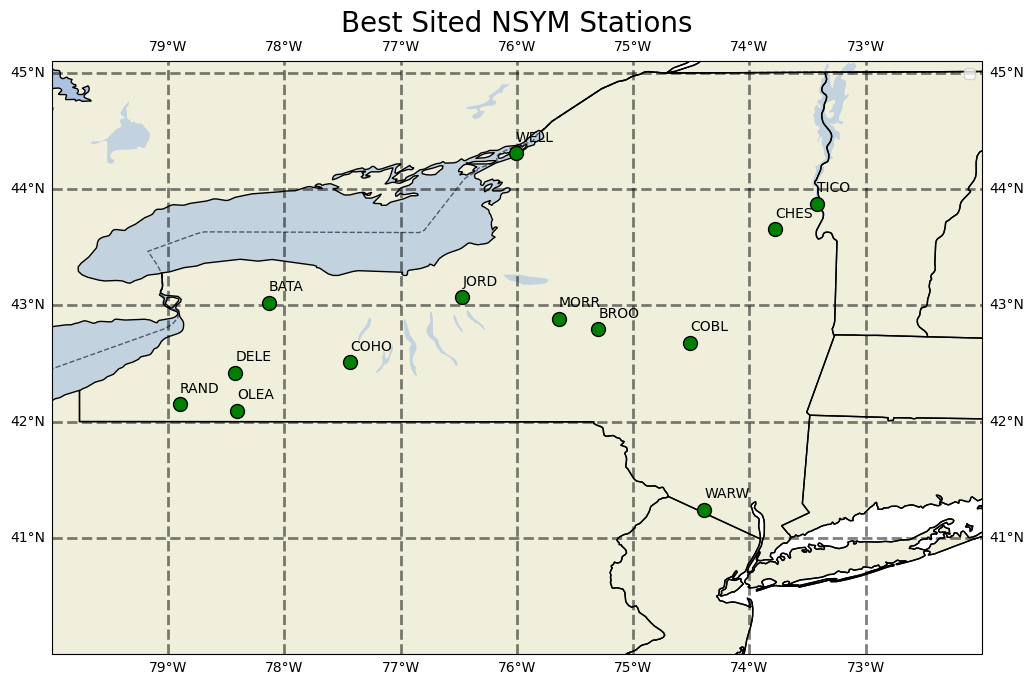

In [121]:
best_worst(best_df, "Best Sited NSYM Stations", "green")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


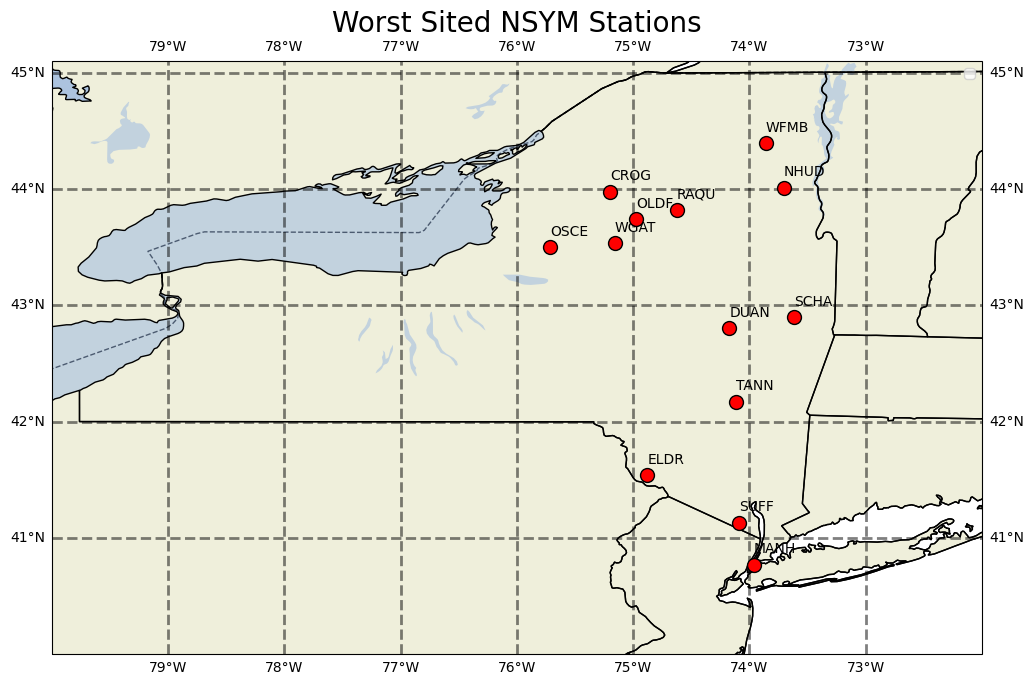

In [122]:
best_worst(worst_df, "Worst Sited NSYM Stations", "red")

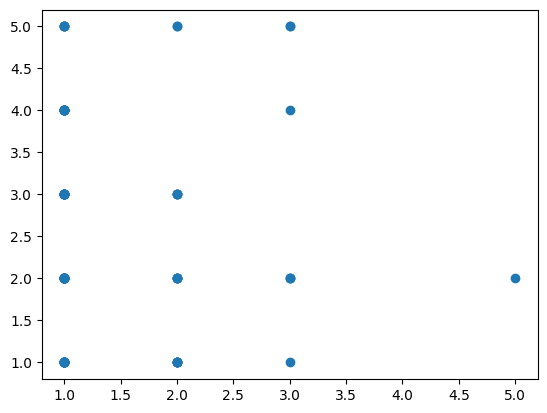

In [123]:
import matplotlib.pyplot as plt

plt.scatter(
    asp_df["aspect_slope_score"], wmo_df["Direct Radiation Class Int"].iloc[:126]
)

In [124]:
pers = scipy.stats.pearsonr(
    asp_df["aspect_slope_score"],
    wmo_df["Global/Diffuse Radiation Class Int"].iloc[:126],
)
rho = scipy.stats.spearmanr(
    asp_df["aspect_slope_score"],
    wmo_df["Global/Diffuse Radiation Class Int"].iloc[:126],
)
tau = scipy.stats.kendalltau(
    asp_df["aspect_slope_score"],
    wmo_df["Global/Diffuse Radiation Class Int"].iloc[:126],
)
print(pers, rho, tau)

PearsonRResult(statistic=0.049471309853133125, pvalue=0.5822393211543254) SignificanceResult(statistic=0.0055825635589373855, pvalue=0.9505309174708665) SignificanceResult(statistic=0.0040274852885059205, pvalue=0.960939613582092)
